In [2]:
# Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import timeit

In [4]:
%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [5]:
import os
import random
from IPython.display import Image
pictures = os.listdir('cutes')

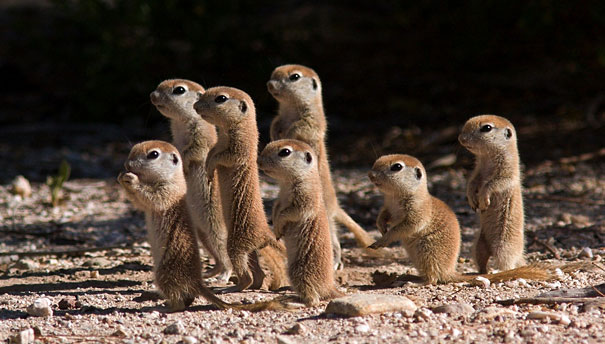

In [6]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

# Co to jest Regresja
* Uczenie nadzorowane
* Ma nam udzielić odpowiedzi w postaci liczby, a nie zmiennej kategorycznej(to nie klasyfikator). 
* Polega na stworzeniu (ciągłej) funkcji, która najlepiej pasuje do danych ze zbioru uczącego

### Jakie funkcje?
* Liniowe
* Wielomianowe
* Jednej zmiennej
* Wielu zmiennych

# Regresja Liniowa (jednej zmiennej)

Regresja liniowa, to metoda dopasowania funkcji LINIOWEJ, która będzie najlepiej odpowiadała zbiorowi uczącemu.

By zrozumieć (i rozwiązać) problem, uczyńmy go realnym. Ale najpierw poznajmy, i nadajmy interpretacje naszemu zbiorowi danych uczących :)

In [7]:
data = pd.read_csv('data/single_var_regresion.csv')
data.columns = ["A", "B"]
data.head(10)

,A,B
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860
5,7.4764,4.3483
6,8.5781,12.0000
7,6.4862,6.5987
8,5.0546,3.8166
9,5.7107,3.2522


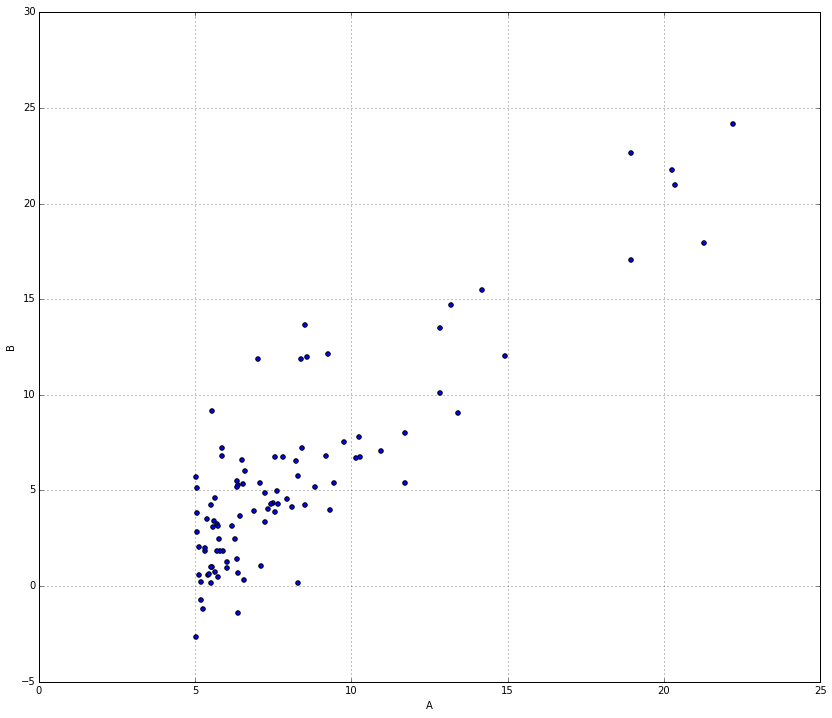

In [8]:
data.plot(kind='scatter',x=data.columns[0], y=data.columns[1])

### Na czym polega zadanie?
Naszym celem jest dopasowanie **LINIOWEJ** funkcji, która będzie **NAJLEPIEJ** opisywać zbiór danych uczących, i będzie pozwalać na prognozowanie wartości dla innych, nowych danych.

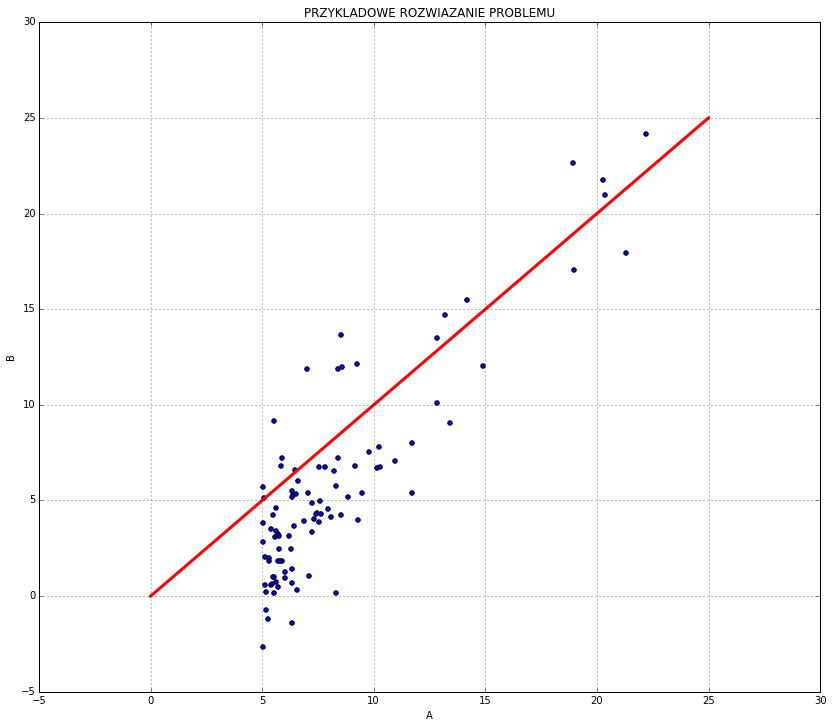

In [9]:
data.plot(kind='scatter',x=data.columns[0], y=data.columns[1], title='PRZYKLADOWE ROZWIAZANIE PROBLEMU')
plt.plot([0, 25], [0, 25], linewidth=3, color='red')

## Co to znaczy, że LINIOWEJ?
Szukamy funkcji w postaci  $y = a\cdot x + b$

A bardziej precyzyjnie (i ściśle nomenklaturowo), szukamy:
$h: x \rightarrow y\ t.\ ze.\ h_\Theta (x) = \Theta_0 + \Theta_1 \cdot x $

gdzie,
* x - zbiór wartości reprezentujących zadawane pytanie (lewa kolumna)
* y - zbiór wartości wynikowych, odpowiedzi na pytanie (prawa kolumna)
* $\Theta_0, \Theta_1$ - współczynniki, powstające w procesie uczenia


Dla przykładu z predykcją ceny domu na podstawie rozmiaru w metrach kwadratowych, mogłaby powstać funkcja taka, że:
$h_\Theta (80) = 300,000$

Co oznacza, że dla mieszkania posiadającego 80 metrów kwadratowych, przewiduje się cenę 300 tyś. złotych.

## Jak ustalić, która funkcja dopasowywuje NAJLEPIEJ?


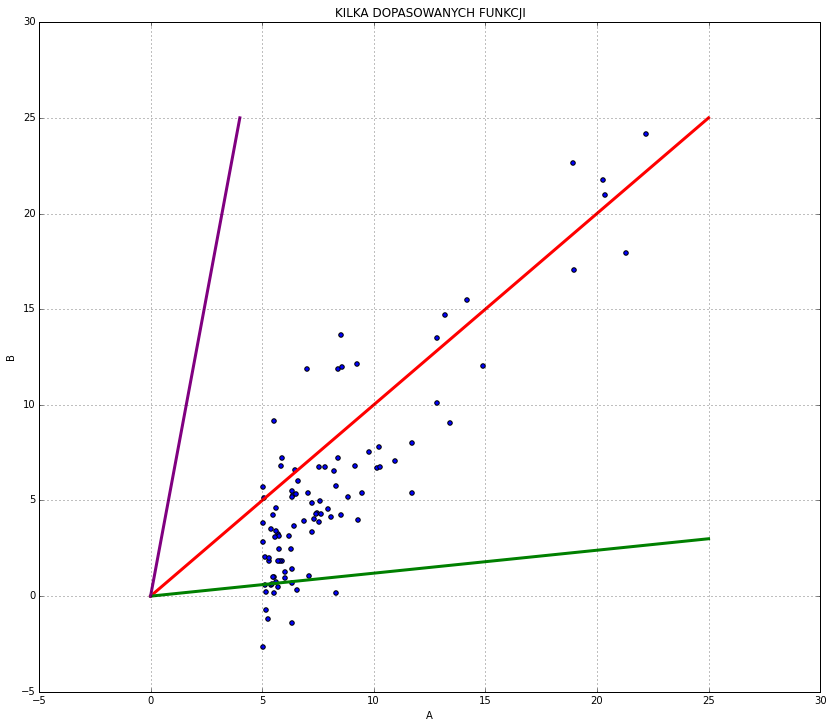

In [10]:
data.plot(kind='scatter',x=data.columns[0], y=data.columns[1], title='KILKA DOPASOWANYCH FUNKCJI')
plt.plot([0, 25], [0, 25], linewidth=3, color='red')
plt.plot([0, 25], [0, 3], linewidth=3, color='green')
plt.plot([0, 4], [0, 25], linewidth=3, color='purple')


## Jak powinniśmy myśleć o problemie?
Stwórzmy funkcje, która będzie miała tym mniejszą wartość, im funkcja dopasowania będzie lepsza.
Następnie znajdźmy jej minimum.


Taką funkcje nazywamy funkcją kosztu, jest ona uzależniona od współczynników funkcji liniowej ($\Theta_0, \Theta_1$)

## Stwórzmy wspólnie taką funkcję kosztu ! 
Ale najpierw obrazek :) 

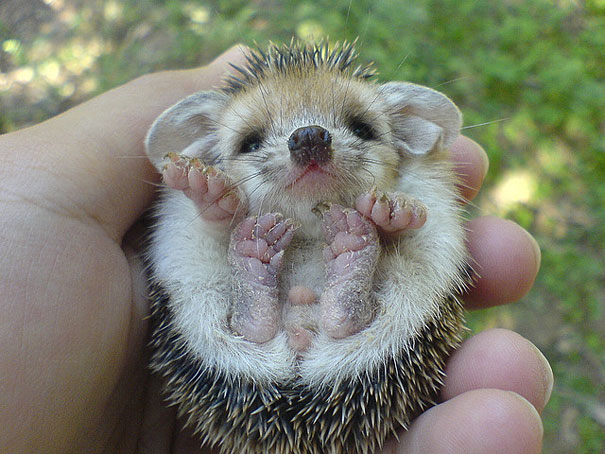

In [102]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

## A teraz nieco bardziej formalnie
Hipoteza: $$h_\Theta (x) = \Theta_0 + \Theta_1 \cdot x$$
Gdzie: $\Theta_i$ - Parametry dopasowywane w procesie uczenia

Definiujemy funkcje kosztu jako: $$J (\Theta_0, \Theta_1) = \frac{1}{2 \cdot m} \cdot \sum \limits^m_{i=1} (h_\Theta(x^{(i)}) - y^{(i)})^2$$m
Gdzie:
* m - rozmiar zbioru uczącego
* i = $1, \dots m$ - indeksy elementów w zbiorze uczącym
* x , y - Odpowiednio zbiór wejściowy (lewa kolumna) i zbiór wyjściowy  (prawa kolumna). To są Wektory!
* $x^{(i)}$  - i-ty element wektora x
* $h_\Theta(x^{(i)})$ - funkcja(liniowa), którą dopasowujemy

### Pytanie za 100 punktów, jakimi wartościami w tym równaniu możemy manipulować w procesie uczenia?


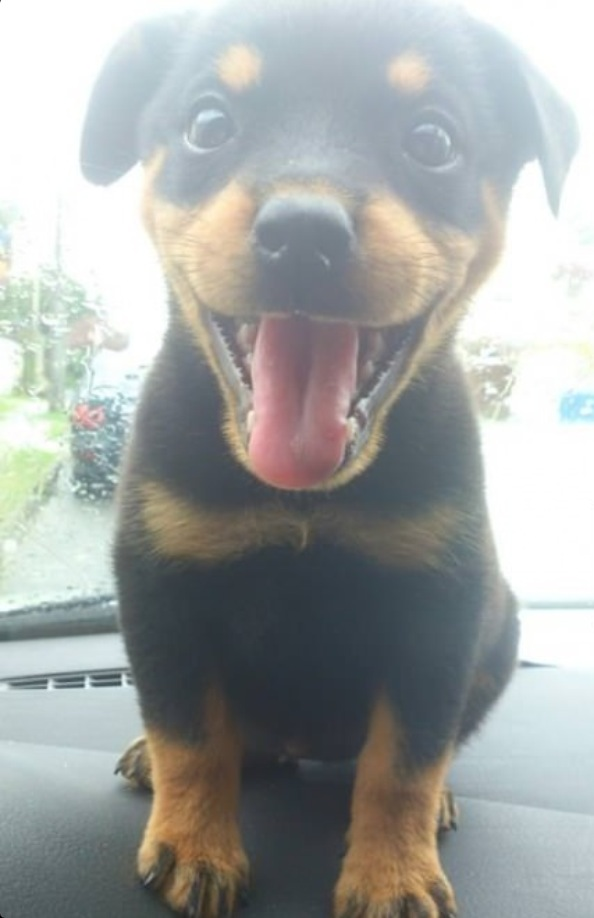

In [26]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

Jedyne wartości jakie możemy ustalić, to poszczególne parametry $\Theta$
Będziemy więc poszukiwać takich wartości $\Theta_0, \Theta_1$, żeby osiągnąć MINIMUM funkcji kosztu $J(\Theta_0, \Theta_1)$

## Podsumowując problem
Funkcja kosztu:
     $$J (\Theta_0, \Theta_1) = \frac{1}{2 \cdot m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)}))^2$$
Cel:
    $$ \min \limits^{}_{\Theta_0, \Theta_1} J(\Theta_0, \Theta_1)$$

###Jak wygląda funkcja J?

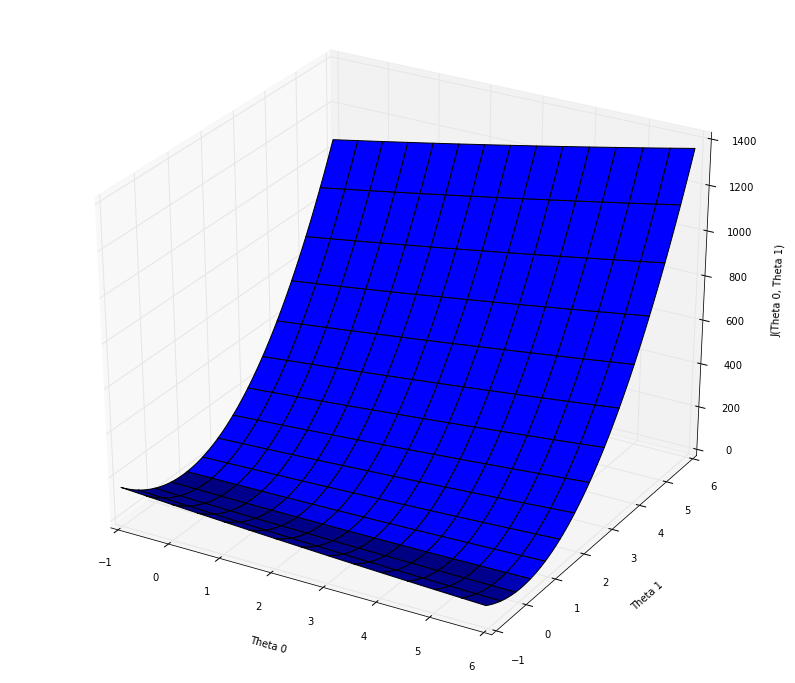

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-1, 6, 0.05)
Theta_0, Theta_1 = np.meshgrid(x, y)
zs = np.array([vect_cost_function(x,y, data.values) for x,y in zip(np.ravel(Theta_0), np.ravel(Theta_1))])
Z = zs.reshape(Theta_0.shape)

ax.plot_surface(Theta_0, Theta_1, Z)

ax.set_xlabel('Theta 0 ')
ax.set_ylabel('Theta 1')
ax.set_zlabel('J(Theta 0, Theta 1)')

plt.show()

## Implementacja funkcji kosztu

In [14]:
def cost_function(Theta_0, Theta_1, points):
    totalError = 0
    x = points[0]
    y = points[1]
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        h = Theta_1 * x + Theta_0
        totalError += (y - h) ** 2
    return totalError / (2.0 * len(points))

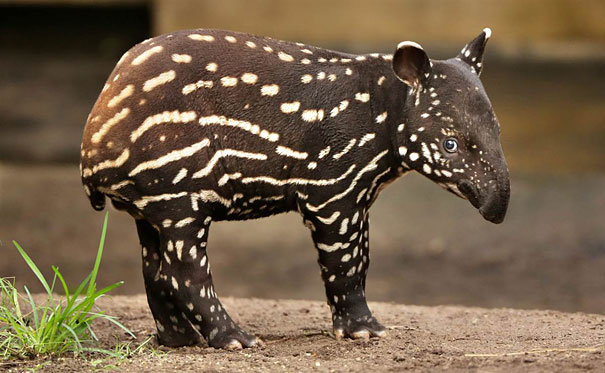

In [16]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

## Wektoryzacja, czyli jak dożyć do końca obliczeń, nie umierając wcześniej ze starości

###WARNING: ROCKET SCIENCE!

In [17]:
def vect_cost_function(Theta_0, Theta_1, points):
    Theta = np.array([Theta_0, Theta_1])
    x = np.dstack((np.ones(points.shape[0]), points[:, 0]))[0]
    y = points[:, 1]
    h = np.dot(Theta, x.T)
    return np.sum((y - h ) ** 2) / (2.0 * len(points))

### Czy warto?

In [241]:
vect_time = timeit.timeit("vect_cost_function(0, 0, data.values)", setup="from __main__ import vect_cost_function, data")
loop_time = timeit.timeit("cost_function(0, 0, data.values)", setup="from __main__ import cost_function,data")
print "Wersja klasyczna wykonywala sie {:.2f} sec. a wersja wektorowa {:.2f} sec".format(loop_time, vect_time)

Wersja klasyczna wykonywala sie 112.20 sec. a wersja wektorowa 44.17 sec


A da się jeszcze dalece optymalniej
* Dodawanie kolumny jedynek wyrzucić poza funkcje
* Skorzystać z pypy 
* Wykorzystać właśność $J(\Theta) = (y - X\Theta)^T(y-X\Theta)$

## Jak zminimalizować wartości funkcji kosztu?
Sposobów jest wiele, właściwie to osobny dział matematyki (Teoria optymalizacji).
Najpopularniejsza jest metoda maksymalnego spadku gradientu

## Algorytm największego spadku gradientu
###Zarys problemu:
Mamy: $J(\Theta_0, \Theta_1)$ (lub $J(\Theta_0, \Theta_1, \Theta_2, \dots, \Theta_n)$)
Chcemy znaleźć $\Theta_0, \Theta_1$ dla którego funkcja kosztu osiąga minimum (co najmniej lokalne)


### Wysokopoziomowy opis rozwiązania
* Zacznijmy z dowolnymi wartościami $\Theta_0, \Theta_1$ np. wylosowanymi (lub równymi 0)
* Zmieniajmy wartości $\Theta_0, \Theta_1$ tak długo, aż trafimy na minumum (co najmniej lokale)

##Metafora z górami

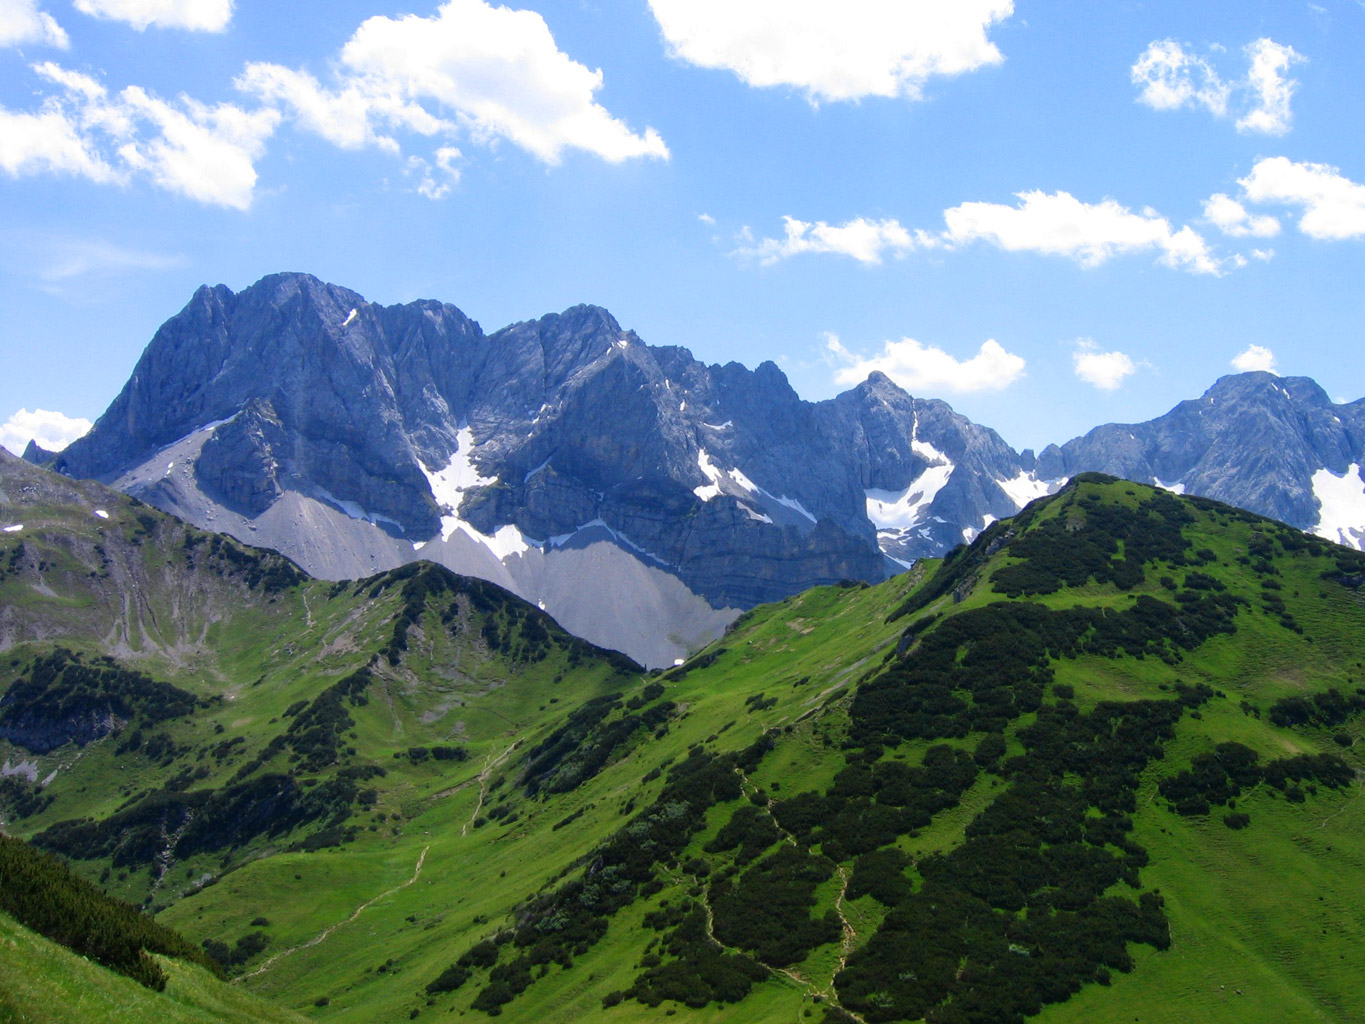

In [18]:
Image('images/zielone-gory.jpg')

Zgubiłeś się w górach, jest tak gęsta mgła, że widzisz tylko na odległość wyciągniętej ręki. Nie wiesz gdzie jesteś, jedyne co pamiętasz, to fakt, że schronisko do którego próbujesz wrócić znajduje się na dnie doliny. Jak w tej sytuacji może pomoc Ci algorytm największego spadku gradientu?

Algorytm powrotu do schroniska:
* Rozglądasz się wokoło, wybierasz kierunek w którym spadek terenu jest największy
* Idziesz krok w kierunku największego spadku
* Procedurę powtarzasz, do momentu dotarcia do schroniska

Problem minimum lokalnego!

### Zapis algorytmu

$$ REPEAT\ UNITL\ COVERGENCE:\ \{ \\
\Theta_j = \Theta_j - \alpha \cdot \frac{\delta J(\Theta_0, \Theta_1)}{\delta \Theta_j} \\ \}$$
gdzie $\alpha$ - Stała uczenia



## Studium przypadku: Algorytm największego spadku gradientu dla regresji liniowej

W algorytmie występują pochodne cząstkowe, policzmy je!

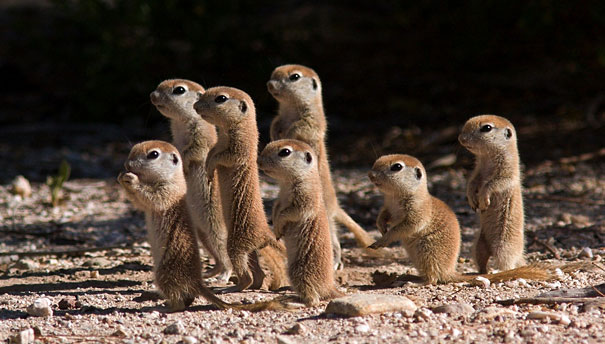

In [8]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))

$$J (\Theta_0, \Theta_1) = \frac{1}{2 \cdot m} \cdot \sum \limits^m_{i=1} (y^{(i)} -h_\Theta(x^{(i)}))^2$$
$$ \frac{\delta J(\Theta_0, \Theta_1)}{\delta \Theta_0} = \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)}))$$
$$ \frac{\delta J(\Theta_0, \Theta_1)}{\delta \Theta_1} = \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \cdot x^{(i)}$$

Policzyliśmy najtrudniejsze, teraz wystarczy wstawić do wzoru
$$REPEAT\ UNITL\ COVERGENCE:\ \{ \\
\Theta_0 = \Theta_0 - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \\ 
\Theta_1 = \Theta_1 - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \cdot x^{(i)} \\ \} $$
gdzie $\alpha$ - Stała uczenia

Bardzo ważne, $\Theta_0, \Theta_1$ muszą być zmieniane w tym samym momencie, np. na końcu powyższej pętli

##Prosta (i piekielnie nieoptymalna obliczeniowo) Implementacja

In [22]:
ERROR_LIST = list()
def step_gradient(Theta_0, Theta_1, points, learningRate):
    tmp_0 = 0
    tmp_1 = 0
    m = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        h = (Theta_1 * x) + Theta_0
        tmp_0 += -(1/m) * (y - h)
        tmp_1 += -(1/m) * x * (y - h)
    Theta_0 = Theta_0 - (learningRate * tmp_0)
    Theta_1 = Theta_1 - (learningRate * tmp_1)
    return [Theta_0, Theta_1]

def gradient_descent_runner(points, Theta_0, Theta_1, learning_rate, num_iterations):
    for i in range(num_iterations):
        Theta_0, Theta_1 = step_gradient(Theta_0, Theta_1, points, learning_rate)
        ERROR_LIST.append(vect_cost_function(Theta_0, Theta_1, points))
    return [Theta_0, Theta_1]

def run():
    points = data.values
    learning_rate = 0.0001
    Theta_0, Theta_1 = 0, 0 
    num_iterations = 100000
    print "Zaczynam Theta_0 = {0}, Theta_1 = {1}, error = {2}".format(Theta_0, Theta_1, vect_cost_function(Theta_0, Theta_1, points))
    [Theta_0, Theta_1] = gradient_descent_runner(data.values, Theta_0, Theta_1, learning_rate, num_iterations)
    print "Po {0} iteracji Theta_0 = {1}, Theta_1 = {2}, error = {3}".format(num_iterations, Theta_0, Theta_1, vect_cost_function(Theta_0, Theta_1, points))
    return Theta_0, Theta_1

Theta_0, Theta_1 = run()


Zaczynam Theta_0 = 0, Theta_1 = 0, error = 30.7949578553
Po 100000 iteracji Theta_0 = -3.50656616821, Theta_1 = 1.14294206209, error = 3.5049034799


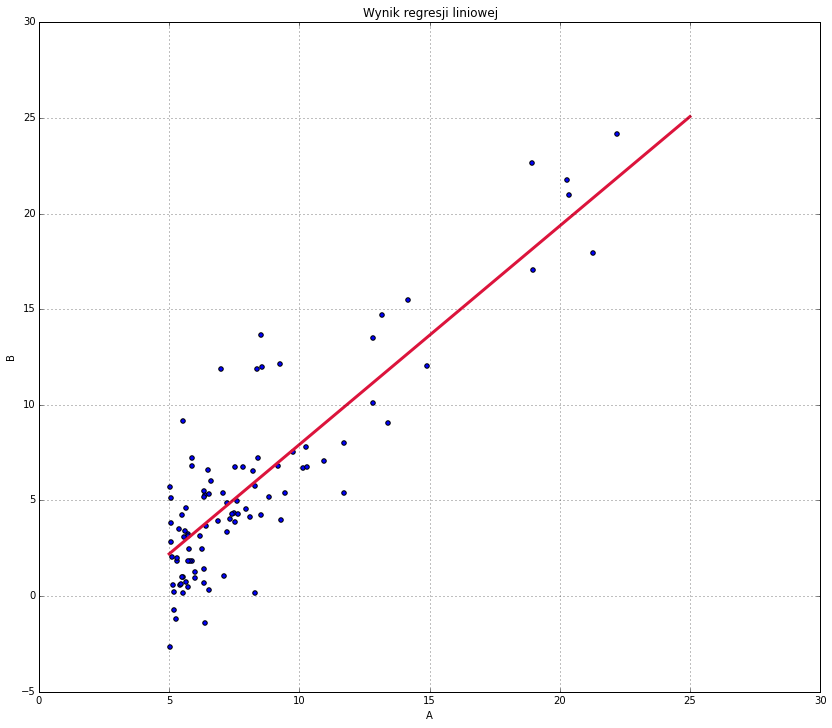

In [23]:
h = lambda x: (Theta_1* x) + Theta_0
data.plot(kind='scatter',x=data.columns[0], y=data.columns[1], title='Wynik regresji liniowej')
plt.plot([5, 25], [h(5), h(25)], linewidth=3, color='crimson')

### Rodzi się kilka ważnych pytań
* Skąd mam wiedzieć, że algorytm działa poprawnie?
* Jak długo wykonywać algorytm?
* Jak dobrać $\alpha$?

Na wszystkie powyższe pytania jest jedna odpowiedź

## Krzywa uczenia

Wyrysujmy sobie, jak w każdej iteracji zmieniała się wartość funkcji kosztu.

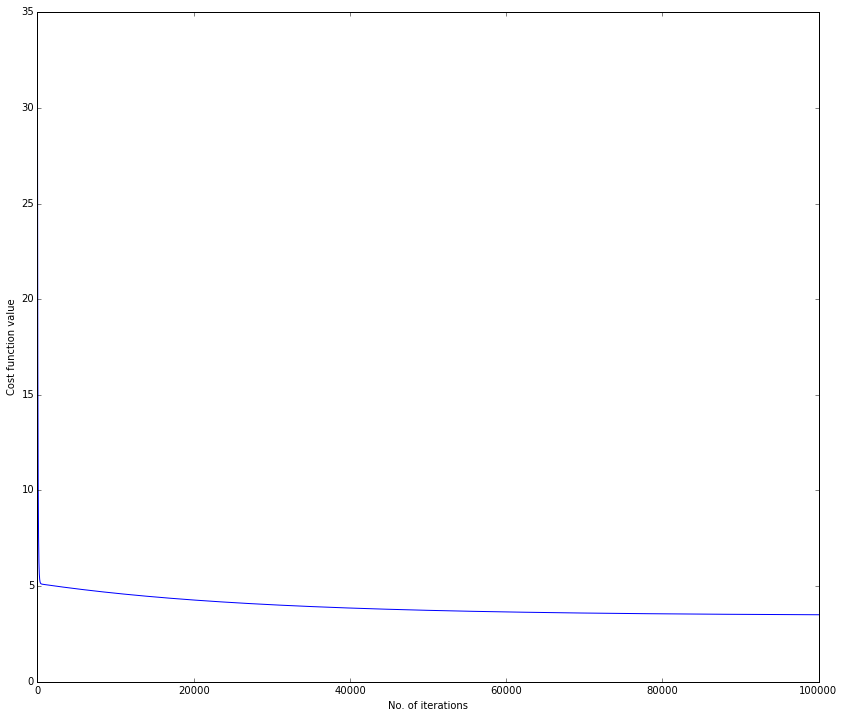

In [24]:
plt.plot(ERROR_LIST)
plt.ylabel('Cost function value')
plt.xlabel('No. of iterations')
plt.show()

## Wektoryzacja
### WARNING: ROCKET SCIENCE

$$ h_\Theta (x) = \sum \limits_{j=0}^m \Theta_j x_j = \Theta^T x $$
Gdzie:
* $ \Theta \in \mathbb{R}^{n+1} $
* $ x \in \mathbb{R}^{n+1}$ - do x trzeba "dokleić" 1 na pierwszej pozycji (by dodać do wyniku $x_0$)

Klasycznie:
$$\Theta_j = \Theta_j - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \cdot x_j^{(i)}\ \ j = \{0, 1, \dots \} $$
Po wektoryzacji:
$$ \Theta = \Theta  -\alpha \cdot \delta \ \ (\Theta \in \mathbb{R}^{n+1}, \alpha \in \mathbb{R}^n, \delta \in \mathbb{R}^{n+1} )  $$
$$\delta = \frac{1}{m} \sum \limits_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}\ \ (x \in \mathbb{R}^{n+1})$$

# Regresja liniowa Wielu zmiennych

Nowy problem wymaga nowego zbioru uczącego. 
Tym razem zbiór danych opisuje ceny mieszkań w Portland (Oregon, USA) 

In [25]:
data_mul = pd.read_csv('data/multi_var_regression.csv')
data_mul.columns = ["Rozmiar (feet^2)", 'Liczba pokojów', 'Cena w $']
data_mul.head(10)

,Rozmiar (feet^2),Liczba pokojów,Cena w $
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900
5,1534,3,314900
6,1427,3,198999
7,1380,3,212000
8,1494,3,242500
9,1940,4,239999


## Potrzebujemy nowej hipotezy

$$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x_1 + \Theta_2 \cdot x_2 $$

Oczywiście, w wypadku większej liczby zmiennych, hipoteza może być dowolnie długa:

$$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x_1 + \dots + \Theta_j \cdot x_j$$

####WARNING: ROCKET SCIENCE
$\Theta$ i x powinny być implementowane jako wektory, wtedy:
$$h_\Theta(x) = \Theta ' x$$


##Funkcja kosztu się nie zmienia:

$$J (\Theta_0, \Theta_1, \dots , \Theta_j) = \frac{1}{2 \cdot m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)}))^2$$
Cel:
    $$ \min \limits^{}_{\Theta_0, \Theta_1,\dots ,\Theta_j  } J(\Theta_0, \Theta_1, \dots, \Theta_j)$$
    


##Skoro funkcja kosztu się niewiele zmienia, to i w algorytmie nie będzie zbyt wiele zmian
$$REPEAT\ UNITL\ COVERGENCE:\ \{ \\
\Theta_0 = \Theta_0 - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \\
\Theta_1 = \Theta_1 - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \cdot x_1^{(i)} \\ \vdots \\
\Theta_j = \Theta_j - \alpha \cdot \frac{1}{m} \cdot \sum \limits^m_{i=1} (y^{(i)} - h_\Theta(x^{(i)})) \cdot x_j^{(i)}
\\ \} $$
gdzie $\alpha$ - Stała uczenia

Bardzo ważne, $\Theta_0, \Theta_1, \dots , \Theta_j$ muszą być zmieniane symultanicznie!


##Skalowanie zmiennych
W zbiorze danych widać wyraźnie, że wartości zmiennych zmieniają się w dalece różnym zakresie.

In [26]:
data_mul.describe() 

,Rozmiar (feet^2),Liczba pokojów,Cena w $
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


Taki stan rzeczy bardzo negatywnie wpływa na jakość funkcji dopasowania, przestrzeń w której rozwiązujemy problem staje się "rozciągnięta", i dalece trudniej będzie nam osiągnąć zbieżność do rozwiązania optymalnego (lub sub-optymalnego)

### Rozwiązanie problemu: Skalowanie zmiennych

Sprawiamy, by wszystkie wartości znalazły się w przedziale $[0, 1]$ lub $[-1, 1]$
Skalujemy tak, żeby największa wartość w zbiorze miała po przeskalowaniu wartość 1
$$ Rozmiar  = \frac{Rozmiar}{\max{(Rozmiar)} - \min{(Rozmiar)}} = \frac{Rozmiar}{4478 - 852} = \frac{Rozmiar}{3626}$$
$$ L.\ pok.  = \frac{L.\ pok. }{\max{(L.\ pok. )} - \min{(L.\ pok. )}} = \frac{L.\ pok. }{5 - 1} = \frac{L.\ pok. }{4}$$

Podobnie powinno się zrobić z wartością wynikową, trzeba jednak zapamiętać wartość, przez którą się skalowało, ponieważ wyniki regresji liniowej będzie jeszcze trzeba przez nią przemnożyć

$$ Cena  = \frac{Cena}{\max{(Cena)} - \min{(Cena)}} = \frac{Cena}{699900 - 169900} = \frac{Cena}{530000}$$

#### Istnieją również bardziej wyrafinowane wzory, np. normalizowanie przez średnią

$$x = \frac{x - mean(x)}{\max(x)-  \min(x)}$$

Przeprowadźmy normalizacje wartości w naszym zbiorze danych

In [27]:
norm_data_mul = data_mul.copy()
columns = norm_data_mul.columns
norm_data_mul[columns[0]] = (norm_data_mul[columns[0]] - norm_data_mul[columns[0]].mean()) / (norm_data_mul[columns[0]].max() - norm_data_mul[columns[0]].min())
norm_data_mul[columns[1]] = (norm_data_mul[columns[1]] - norm_data_mul[columns[1]].mean()) / (norm_data_mul[columns[1]].max() - norm_data_mul[columns[1]].min())
norm_data_mul[columns[2]] = (norm_data_mul[columns[2]] - norm_data_mul[columns[2]].mean()) / (norm_data_mul[columns[2]].max() - norm_data_mul[columns[1]].min())

In [28]:
norm_data_mul.describe()

,Rozmiar (feet^2),Liczba pokojów,Cena w $
count,4.600000e+01,4.600000e+01,4.600000e+01
mean,-2.534205e-17,2.896234e-17,-4.223675e-18
std,2.215480e-01,1.922408e-01,1.801733e-01
min,-3.161707e-01,-5.434783e-01,-2.417764e-01
25%,-1.569042e-01,-4.347826e-02,-1.274745e-01
50%,-3.542051e-02,-4.347826e-02,-5.603576e-02
75%,7.889278e-02,2.065217e-01,4.251396e-02
max,6.838293e-01,4.565217e-01,5.154740e-01


In [29]:
cost_scale = data_mul[data_mul.columns[2]].max() /  norm_data_mul[norm_data_mul.columns[2]].max() 
print "Wartość do skalowania predykowanej ceny: {}".format(cost_scale)

Wartość do skalowania predykowanej ceny: 1357779.40145


## Implementacja regresji liniowej wielu zmiennych

In [30]:
def mul_vect_cost_function(Theta_0, Theta_1,Theta_2, points):
    Theta = np.array([Theta_0, Theta_1, Theta_2])
    x = np.dstack((np.ones(points.shape[0]), points[:, 0], points[:, 1]))[0]
    y = points[:, 2]
    h = np.dot(Theta, x.T)
    return np.sum((y - h ) ** 2) / (2.0 * len(points))

In [ ]:
MUL_ERROR_LIST = list()
def step_gradient(Theta_0, Theta_1, Theta_2, points, learningRate):
    tmp_0 = 0
    tmp_1 = 0
    tmp_2 = 0
    m = float(len(points))
    for i in range(0, len(points)):
        x_1 = points[i, 0]
        x_2 = points[i, 1]
        y = points[i, 2]
        h = (Theta_2 * x_2) + (Theta_1 * x_1) + Theta_0
        tmp_0 += -(1/m) * (y - h)
        tmp_1 += -(1/m) * x_1 * (y - h)
        tmp_2 += -(1/m) * x_2 * (y - h)
    Theta_0 = Theta_0 - (learningRate * tmp_0)
    Theta_1 = Theta_1 - (learningRate * tmp_1)
    Theta_2 = Theta_2 - (learningRate * tmp_2)
    return Theta_0, Theta_1, Theta_2

def gradient_descent_runner(points, Theta_0, Theta_1, Theta_2, learning_rate, num_iterations):
    for i in range(num_iterations):
        Theta_0, Theta_1, Theta_2 = step_gradient(Theta_0, Theta_1, Theta_2, points, learning_rate)
        MUL_ERROR_LIST.append(mul_vect_cost_function(Theta_0, Theta_1, Theta_2, points))
    return Theta_0, Theta_1, Theta_2

def run():
    points = norm_data_mul.values
    learning_rate = 0.0001
    Theta_0, Theta_1, Theta_2 = 0, 0, 0 
    num_iterations = 1000000
    print "Zaczynam Theta_0 = {}, Theta_1 = {}, Theta_2 = {}, error = {}".format(Theta_0, Theta_1, Theta_2, mul_vect_cost_function(Theta_0, Theta_1, Theta_2, points)*cost_scale)
    [Theta_0, Theta_1, Theta_2] = gradient_descent_runner(points, Theta_0, Theta_1, Theta_2, learning_rate, num_iterations)
    print "Po {} iteracji Theta_0 = {}, Theta_1 = {}, Theta_2 = {}, error = {}".format(num_iterations, Theta_0, Theta_1, Theta_2, mul_vect_cost_function(Theta_0, Theta_1, Theta_2, points)*cost_scale)
    return Theta_0, Theta_1, Theta_2

Theta_0, Theta_1, Theta_2 = run()


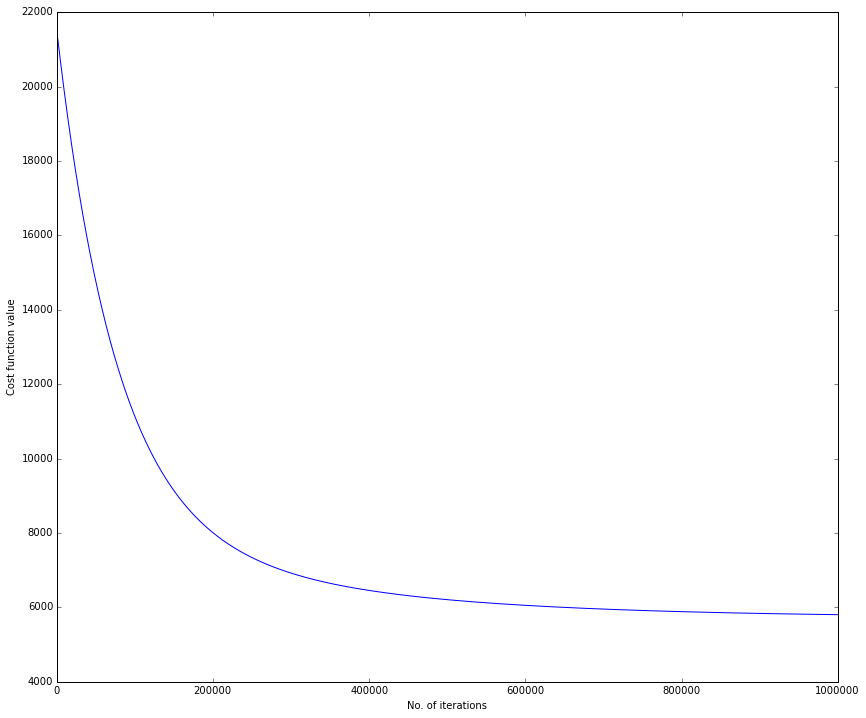

In [34]:
plt.plot(MUL_ERROR_LIST * cost_scale)
plt.ylabel('Cost function value')
plt.xlabel('No. of iterations')
plt.show()

# Regresja wielomianowa
Funkcja liniowa jest bardzo prosta, nic nie stoi na przeszkodzie, by skomplikować naszą funkcje dopasowania (hipotezę)
$$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x + \Theta_2 \cdot x^2 + \Theta_3 \cdot x^3 \dots$$
A może jeszcze bardziej skomplikowana funkcja będzie dopasowywała się do danych jeszcze lepiej?
 $$h_\Theta(x) = \Theta_0 + \Theta_1 \cdot x + \Theta_2 \cdot \sqrt{x }  + \Theta_3 \cdot log{x}\dots$$
 
 Wszystko jest kwestią wyczucia i zrozumienia danych dla których budujemy hipotezę.
 
 WAŻNA UWAGA: Podnoszenie potęgowanie i pierwiastkowanie x sprawia, że skalowanie (o której za chwilę) staje się super ważna

# Normal Equations
Istnieje analityczne metoda liczenia minimum (zamiast optymalnego spadku gradientu), nie wymaga ona iteracji ani skalowania. Wystarczy zastosować poniższy wzór:
$$ \Theta = (X^T\cdot X)^{-1} \cdot X^T \cdot y$$

Gdzie:
* $\Theta \in \mathbb{R}^{n+1}$ - współczynniki hipotezy
* X - Macież ze wszystkimi zmiennymi (rozmiar mieszkania, ilość łazienek) WAŻNE: pierwsza kolumna wypełniona jedynkami
* y - wektor odpowiedzi

Problemem jest jednak fakt, że odwracanie macierzy jest bardzo wolne, i w praktyce metoda może być stosowana jedynie dla niewielkich zbiorów w niewielką liczbą cech.

# A na koniec słodziak za wytrwałość !

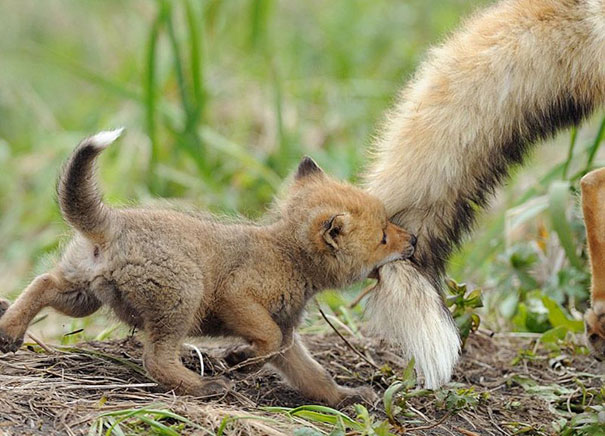

In [74]:
Image(os.path.join('.', 'cutes', random.choice(pictures)))